In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
data = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data.csv")
data = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data_2.csv")

In [7]:
data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [9]:
shape = data.shape
data_types = data.dtypes
summary_stats = data.describe()
missing_values = data.isnull().sum()
unique_values = data.select_dtypes(include=['object', 'category']).nunique()
target_value_counts = data['Is Fraudulent'].value_counts(normalize=True)

print(shape, data_types, summary_stats, missing_values, unique_values, target_value_counts)

(23634, 16) Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object        Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        23634.000000  23634.000000  23634.000000   23634.000000   
mean           229.367099      3.000550     34.560210       0.051705   
std            282.046669      1.419663     10.009471       0.221436   
min             10.000000      1.000000     -2.000000       0.000000   
25%             69.070000      2.000000     28.000000       0.000000   
50%            151.415000      3.000000     35.000000       0.

**Observations:**

The dataset contains 23,634 rows and 16 columns.
There are no missing values in the dataset.
The dataset consists of 1 Float64 type column, 10 Object type columns, and 5 Int64 type columns.
The 'Is Fraudulent' column is the target variable that represents whether the transaction is fraudulent or not, with 0 indicating not fraudulent and 1 indicating fraudulent.
The summary statistics reveal that the average transaction amount is approximately $229.37, with a standard deviation of $282.05. The minimum transaction amount is $10.00, and the maximum is $9716.50.
The value counts for the target variable 'Is Fraudulent' show that 94.83% of the transactions are not fraudulent, while 5.17% are fraudulent, indicating an imbalanced dataset.

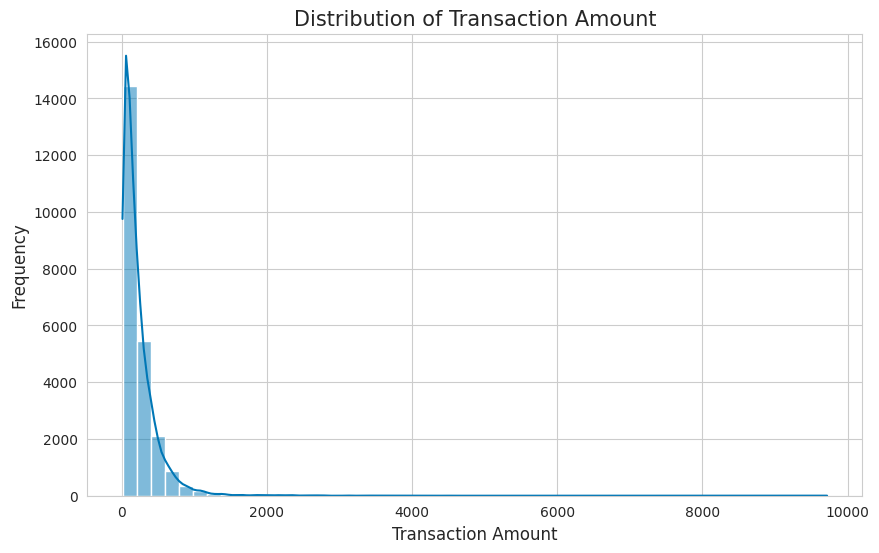

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction Amount'], bins=50, kde=True, color='#0077B6')
plt.title('Distribution of Transaction Amount', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

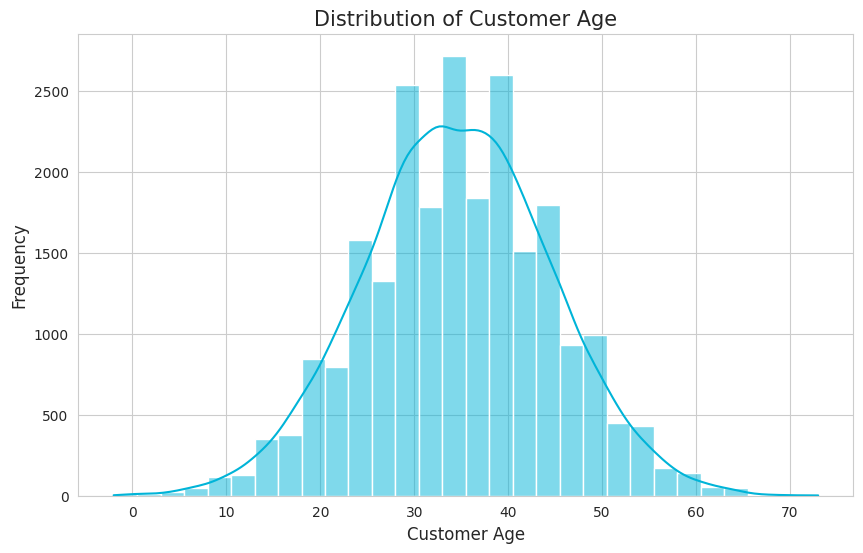

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=30, kde=True, color='#00B4D8')
plt.title('Distribution of Customer Age', fontsize=15)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

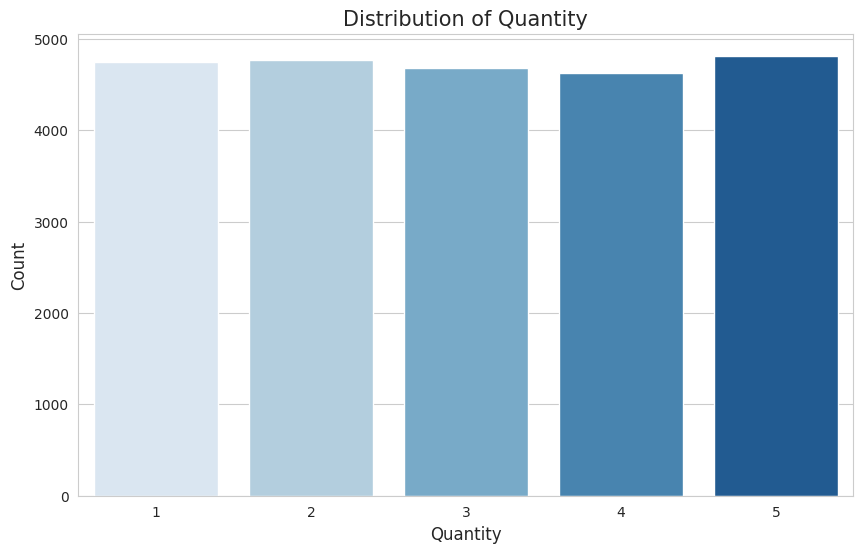

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Quantity'], palette='Blues')
plt.title('Distribution of Quantity', fontsize=15)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


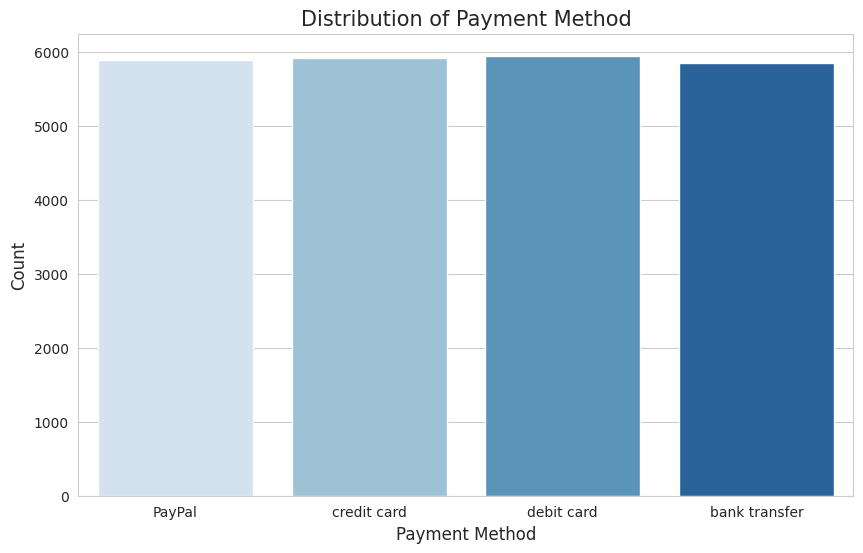

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Payment Method'], palette='Blues')
plt.title('Distribution of Payment Method', fontsize=15)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

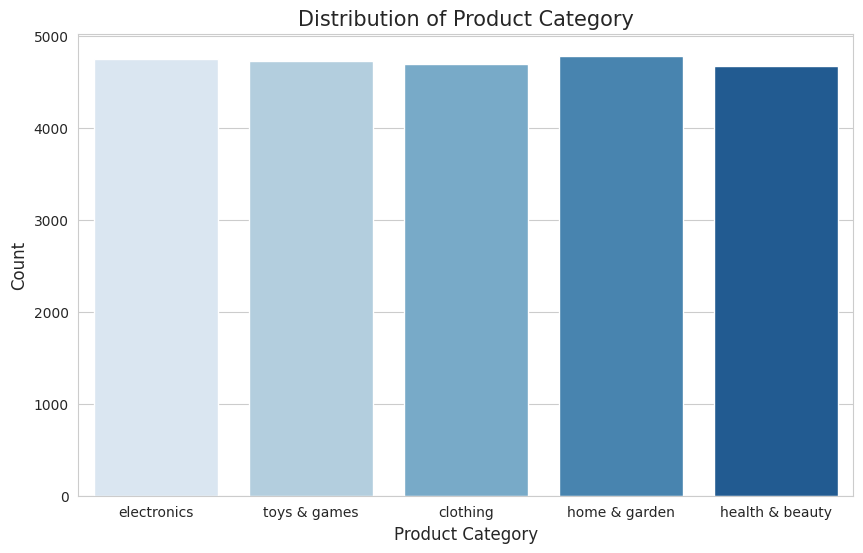

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Product Category'], palette='Blues')
plt.title('Distribution of Product Category', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

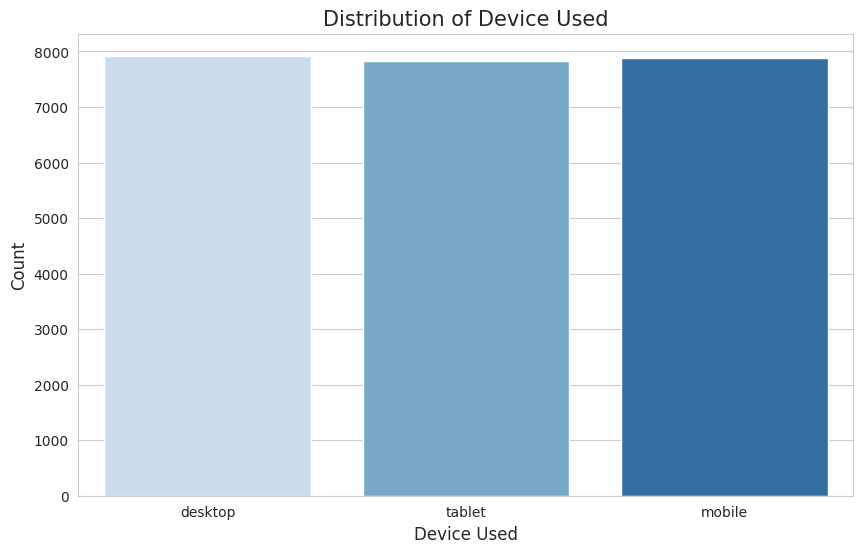

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Device Used'], palette='Blues')
plt.title('Distribution of Device Used', fontsize=15)
plt.xlabel('Device Used', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

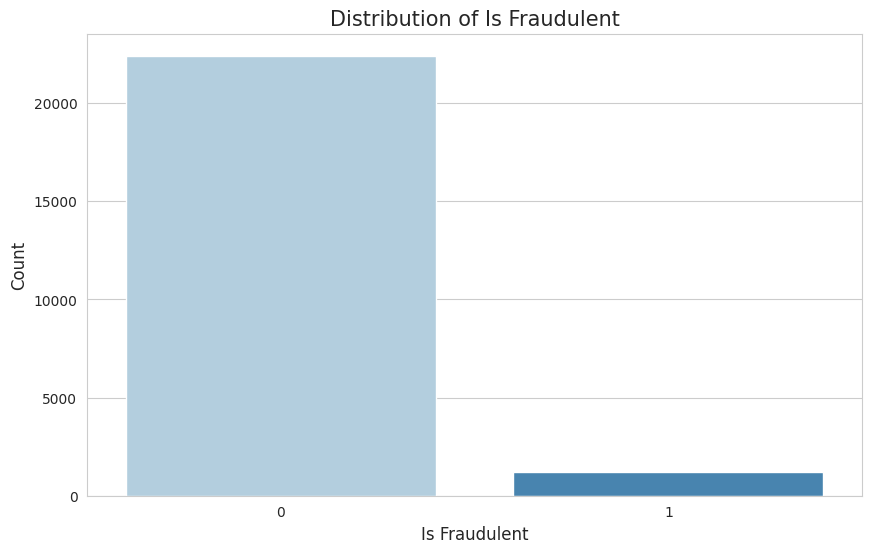

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Is Fraudulent'], palette='Blues')
plt.title('Distribution of Is Fraudulent', fontsize=15)
plt.xlabel('Is Fraudulent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


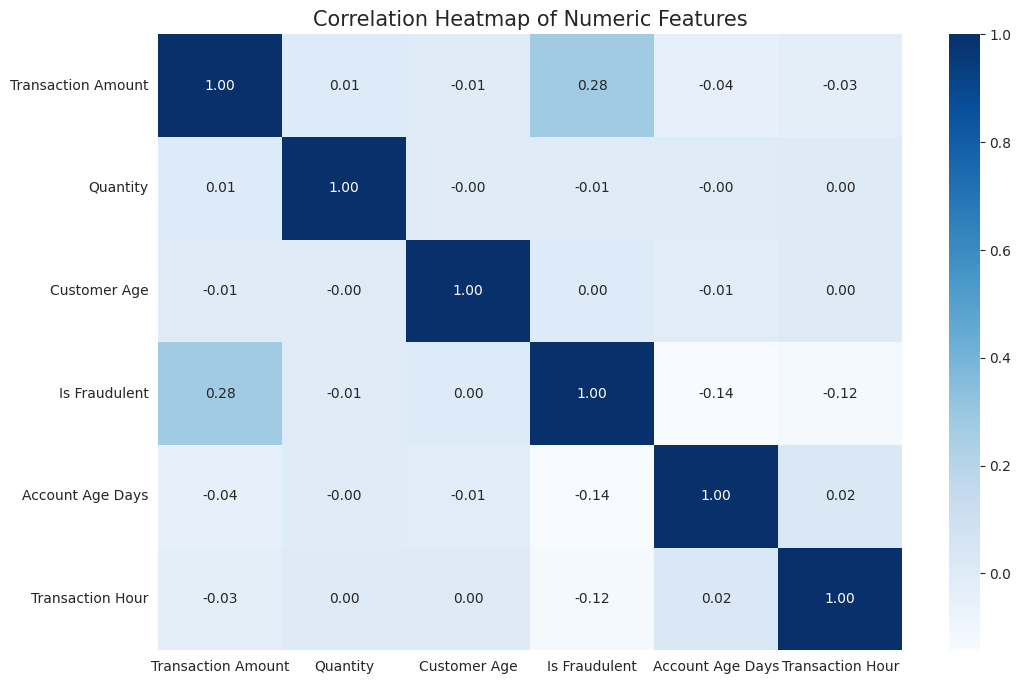

In [17]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features', fontsize=15)
plt.show()

**In-Depth Observations:**

The distribution of Transaction Amount is right-skewed, with most transactions involving smaller amounts and a few transactions involving very high amounts.

There are outliers with very high transaction amounts that may require further investigation.
The distribution of Customer Age is fairly normal, with most customers being between 25 and 45 years old.

There are outliers with negative ages, which could be data entry errors and may need correction.

The distribution of Quantity is fairly evenly distributed across 1 to 5, with a slight preference for lower quantities.

Credit card is the most popular payment method, followed by PayPal and debit card.

The "other" payment method category has the fewest transactions.

Electronics is the most popular product category, followed by clothing and toys & games.
Home & kitchen and other product categories have fewer transactions.

Desktop and mobile devices are the most commonly used for transactions, with tablets being less common.

The majority of transactions are not fraudulent, indicating an imbalanced dataset with respect to the target variable.

The correlation heatmap shows no strong correlation between the numerical features and the target variable 'Is Fraudulent'.

The highest correlation observed is between 'Transaction Amount' and 'Quantity'.

The dataset is imbalanced with respect to the target variable, which might require special handling during modeling to improve fraud detection performance.

The presence of outliers in 'Transaction Amount' and 'Customer Age' might require further investigation and potential outlier treatment.

The distribution of payment methods and product categories might provide insights into consumer preferences and could be important features for fraud detection.

The lack of strong correlations between features and the target variable suggests that nonlinear relationships might exist, and advanced modeling techniques may be required to capture these relationships effectively.

In [18]:
data['Address_Mismatch'] = (data['Shipping Address'] != data['Billing Address']).astype(int)
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Transaction_Weekday'] = data['Transaction Date'].dt.dayofweek
data['Transaction_Hour'] = data['Transaction Date'].dt.hour

customer_freq = data['Customer ID'].value_counts().to_dict()
data['Customer_Frequency'] = data['Customer ID'].map(customer_freq)

avg_amount_per_category = data.groupby('Product Category')['Transaction Amount'].transform('mean')
data['Amount_Higher_Than_Average'] = (data['Transaction Amount'] > avg_amount_per_category).astype(int)
data[['Address_Mismatch', 'Transaction_Weekday', 'Transaction_Hour', 'Customer_Frequency', 'Amount_Higher_Than_Average']].head()

,Address_Mismatch,Transaction_Weekday,Transaction_Hour,Customer_Frequency,Amount_Higher_Than_Average
0,0,6,23,1,0
1,0,0,0,1,1
2,1,0,8,1,1
3,0,1,20,1,0
4,0,1,15,1,0


In [19]:
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

X = data.drop(['Transaction ID', 'Customer ID', 'Transaction Date', 'Is Fraudulent',
               'Shipping Address', 'Billing Address', 'IP Address'], axis=1)
y = data['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

classification_report_rf = classification_report(y_test, y_pred)
confusion_matrix_rf = confusion_matrix(y_test, y_pred)

print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4483
           1       0.95      0.36      0.52       244

    accuracy                           0.97      4727
   macro avg       0.96      0.68      0.75      4727
weighted avg       0.97      0.97      0.96      4727



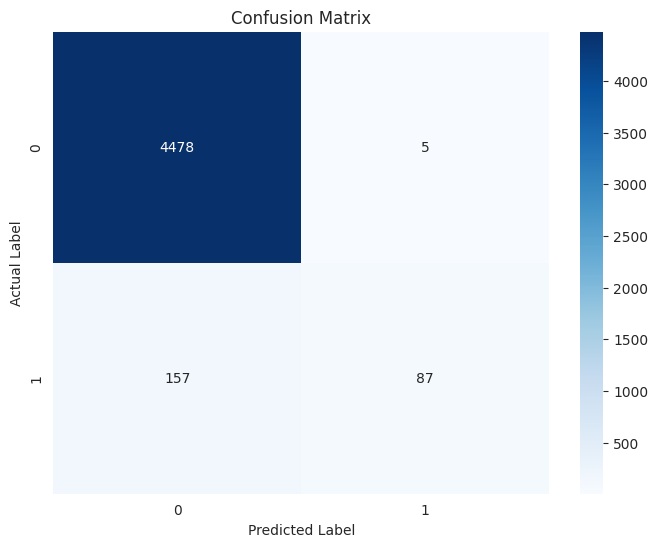

In [20]:
# Reformatting and plotting the confusion matrix with better formatting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, cmap='Blues', annot=True, fmt='.0f')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Model Performance Observations:**

The model has a high precision of 95% for the fraudulent class (1), indicating that when it predicts fraud, it is usually correct.
However, the model's recall for the fraudulent class is only 36%, which means it fails to detect a significant number of fraudulent transactions.

The overall accuracy of the model is 97%, suggesting that it performs well on the majority class.

Despite the high precision, the F1-score for the fraudulent class is 52%, revealing a need to improve recall to better identify fraudulent transactions.

The weighted average F1-score across both classes is 96%, indicating that the model's performance is skewed towards the non-fraudulent transactions due to the class imbalance.

**Challenge for Improvement:**

There is a challenge to enhance the recall for the fraudulent class without significantly compromising the precision.

Strategies such as adjusting the class weight, applying resampling techniques, or using anomaly detection algorithms could be explored to achieve this.

Participants are encouraged to utilize advanced feature engineering, explore different model architectures, and adjust hyperparameters to improve the model's ability to detect fraudulent transactions.

The goal is to reduce the false negatives (currently at 157), thereby increasing the model's sensitivity to fraud.